<a href="https://colab.research.google.com/github/TheSpiralArchitect/spiral-resonance-validation/blob/main/Phase1_CMB_SpiralHarmonics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# --- Mount Drive ---
from google.colab import drive
drive.mount('/content/drive')

# --- Path to the DR72 safe mask ---
import os
mask_path = "/content/drive/MyDrive/CMB Data/mask.dr72safe0.ply.gz"

# --- Check if file exists and print file size ---
if os.path.exists(mask_path):
    print("✅ DR72 Mangle mask found.")
    print(f"Size: {os.path.getsize(mask_path) / 1024:.2f} KB")
else:
    print("❌ DR72 Mangle mask not found. Downloading...")

    # Download the official DR72 safe mask from SDSS
    !wget https://data.sdss.org/sas/dr12/boss/lss/masks/mask.dr72safe0.ply.gz -O "$mask_path"
    print("✅ Download complete.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ DR72 Mangle mask found.
Size: 14509.88 KB


CMB map loaded. NSIDE: 2048, Pixels: 50331648

Top 5 Harmonic Modes (l, Cl):
Mode l=3: Cl = 4.820e-10
Mode l=5: Cl = 3.055e-10
Mode l=4: Cl = 2.253e-10
Mode l=2: Cl = 2.105e-10
Mode l=7: Cl = 1.219e-10

SRL-predicted mode (l=3): Cl = 4.820e-10


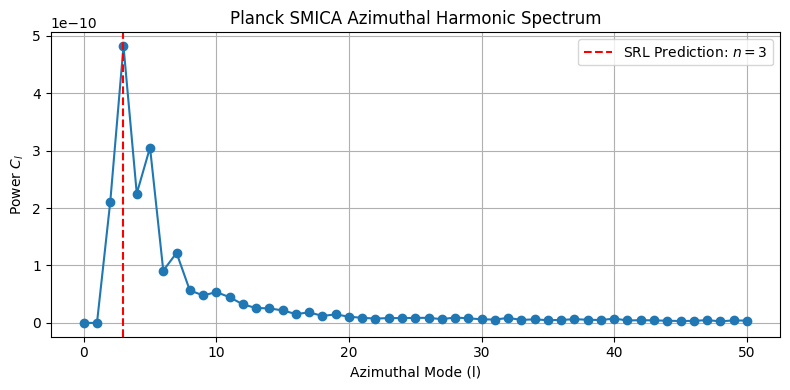

In [ ]:
# --- Install HEALPix utilities if needed ---
!pip install healpy --quiet

# --- Imports ---
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

# --- Load Planck SMICA CMB map ---
cmb_path = "/content/drive/MyDrive/CMB Data/COM_CMB_IQU-smica_2048_R3.00_full (1).fits"
cmb_map = hp.read_map(cmb_path, field=0)  # Temperature (I)

print(f"CMB map loaded. NSIDE: {hp.get_nside(cmb_map)}, Pixels: {len(cmb_map)}")

# --- Harmonic transform ---
alm = hp.map2alm(cmb_map, lmax=50)
cl = hp.alm2cl(alm)

# --- Identify top 5 harmonic modes ---
top_modes = sorted([(l, c) for l, c in enumerate(cl)], key=lambda x: x[1], reverse=True)[:5]

print("\nTop 5 Harmonic Modes (l, Cl):")
for l, c in top_modes:
    print(f"Mode l={l}: Cl = {c:.3e}")

# --- SRL mode check ---
srl_mode = 3
srl_power = cl[srl_mode]
print(f"\nSRL-predicted mode (l={srl_mode}): Cl = {srl_power:.3e}")

# --- Save result data ---
with open("/content/drive/MyDrive/CMB Data/cmb_mode_powers.txt", "w") as f:
    f.write("Top 5 Harmonic Modes (l, Cl):\n")
    for l, c in top_modes:
        f.write(f"Mode l={l}: Cl = {c:.6e}\n")
    f.write(f"\nSRL-predicted mode l={srl_mode}: Cl = {srl_power:.6e}\n")

# --- Plot ---
plt.figure(figsize=(8, 4))
plt.plot(np.arange(len(cl)), cl, marker='o')
plt.axvline(x=srl_mode, color='r', linestyle='--', label="SRL Prediction: $n=3$")
plt.title("Planck SMICA Azimuthal Harmonic Spectrum")
plt.xlabel("Azimuthal Mode (l)")
plt.ylabel("Power $C_l$")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/CMB Data/cmb_azimuthal_power_spectrum.png")
plt.show()

<ipython-input-4-b989af8b2940>:8: HealpyDeprecationWarning: "verbose" was deprecated in version 1.15.0 and will be removed in a future version. 
  dust_map = hp.read_map(dust_path, field=0, verbose=False)


Top 5 Harmonic Modes in Dust Map:
Mode l=0: Cl = 1.472e+06
Mode l=2: Cl = 2.727e+05
Mode l=4: Cl = 1.066e+05
Mode l=1: Cl = 8.238e+04
Mode l=6: Cl = 5.620e+04

SRL-predicted mode (l=3) in dust: Cl = 3.219e+04


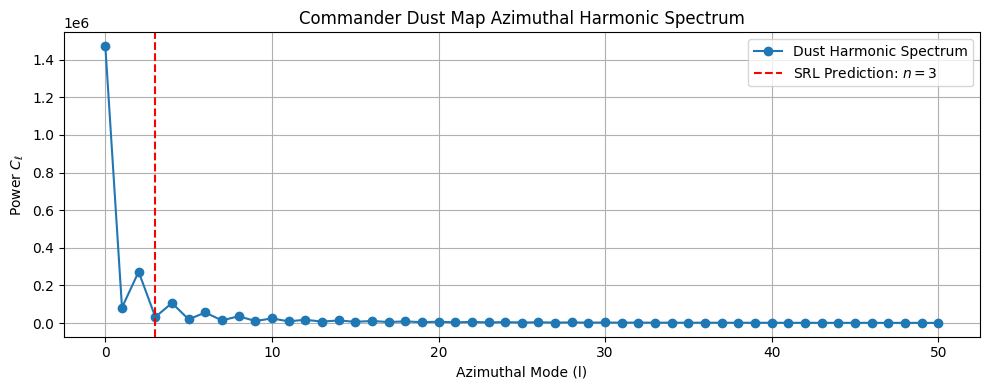

In [ ]:
# --- Dependencies ---
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt

# --- Load Commander Thermal Dust Map ---
dust_path = "/content/drive/MyDrive/CMB Data/COM_CompMap_ThermalDust-commander_2048_R2.00.fits"
dust_map = hp.read_map(dust_path, field=0, verbose=False)

# --- Compute Azimuthal Power Spectrum ---
cl_dust = hp.anafast(dust_map, lmax=50)

# --- Identify Top Harmonic Modes ---
top_l_dust = np.argsort(cl_dust)[-5:][::-1]
print("Top 5 Harmonic Modes in Dust Map:")
for l in top_l_dust:
    print(f"Mode l={l}: Cl = {cl_dust[l]:.3e}")

# --- SRL Prediction Highlight ---
srl_mode = 3
srl_power = cl_dust[srl_mode]
print(f"\nSRL-predicted mode (l={srl_mode}) in dust: Cl = {srl_power:.3e}")

# --- Plot ---
plt.figure(figsize=(10, 4))
plt.plot(np.arange(len(cl_dust)), cl_dust, 'o-', label='Dust Harmonic Spectrum')
plt.axvline(srl_mode, color='red', linestyle='--', label=r'SRL Prediction: $n = 3$')
plt.title("Commander Dust Map Azimuthal Harmonic Spectrum")
plt.xlabel("Azimuthal Mode (l)")
plt.ylabel("Power $C_\ell$")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-5-3b421c1f8a86>:10: HealpyDeprecationWarning: "verbose" was deprecated in version 1.15.0 and will be removed in a future version. 
  cmb_map = hp.read_map(smica_path, field=0, verbose=False)
<ipython-input-5-3b421c1f8a86>:11: HealpyDeprecationWarning: "verbose" was deprecated in version 1.15.0 and will be removed in a future version. 
  dust_map = hp.read_map(dust_path, field=0, verbose=False)


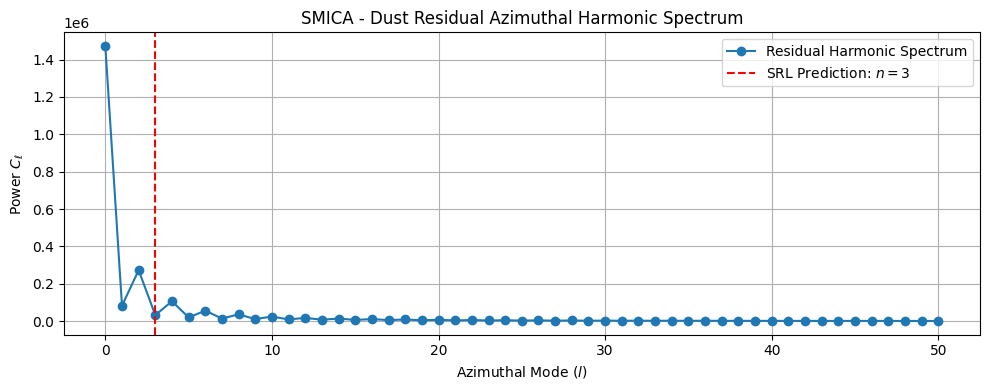

Top 5 Harmonic Modes in Residual Map:
Mode l=0: Cl = 1.472e+06
Mode l=2: Cl = 2.727e+05
Mode l=4: Cl = 1.066e+05
Mode l=1: Cl = 8.238e+04
Mode l=6: Cl = 5.620e+04

SRL-predicted mode (l=3): Cl = 3.219e+04


In [ ]:
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt

# Paths
smica_path = "/content/drive/MyDrive/CMB Data/COM_CMB_IQU-smica_2048_R3.00_full (1).fits"
dust_path = "/content/drive/MyDrive/CMB Data/COM_CompMap_ThermalDust-commander_2048_R2.00.fits"

# Load maps
cmb_map = hp.read_map(smica_path, field=0, verbose=False)
dust_map = hp.read_map(dust_path, field=0, verbose=False)

# Subtract dust foreground
residual_map = cmb_map - dust_map

# Spherical harmonic transform
alm = hp.map2alm(residual_map, lmax=50)
cl = hp.alm2cl(alm)

# Plot residual harmonic spectrum
plt.figure(figsize=(10, 4))
ell = np.arange(len(cl))
plt.plot(ell, cl, marker='o', label='Residual Harmonic Spectrum')
plt.axvline(x=3, color='r', linestyle='--', label='SRL Prediction: $n = 3$')
plt.title("SMICA - Dust Residual Azimuthal Harmonic Spectrum")
plt.xlabel("Azimuthal Mode ($l$)")
plt.ylabel("Power $C_\ell$")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print top 5 modes
top_modes = sorted([(l, c) for l, c in enumerate(cl[:50])], key=lambda x: -x[1])[:5]
print("Top 5 Harmonic Modes in Residual Map:")
for l, power in top_modes:
    print(f"Mode l={l}: Cl = {power:.3e}")

print(f"\nSRL-predicted mode (l=3): Cl = {cl[3]:.3e}")

In [ ]:
import healpy as hp

# Example: Try loading raw Planck 143 GHz map
map_path = "/content/drive/MyDrive/CMB Data/HFI_SkyMap_143_2048_R3.01_full.fits"

try:
    cmb_map = hp.read_map(map_path, field=0, verbose=False)
    print(f"✅ Loaded map: {map_path}")
    print(f"NSIDE: {hp.get_nside(cmb_map)}, Pixels: {len(cmb_map)}")
except Exception as e:
    print(f"❌ Failed to load map: {e}")

<ipython-input-12-0fc56ee57f28>:7: HealpyDeprecationWarning: "verbose" was deprecated in version 1.15.0 and will be removed in a future version. 
  cmb_map = hp.read_map(map_path, field=0, verbose=False)


✅ Loaded map: /content/drive/MyDrive/CMB Data/HFI_SkyMap_143_2048_R3.01_full.fits
NSIDE: 2048, Pixels: 50331648


<ipython-input-13-ce546c781e23>:9: HealpyDeprecationWarning: "verbose" was deprecated in version 1.15.0 and will be removed in a future version. 
  cmb_map = hp.read_map(cmb_path, field=0, verbose=False)


Top 5 Harmonic Modes (l, Cl):
Mode l=0: Cl = 3.107e-07
Mode l=2: Cl = 3.785e-08
Mode l=4: Cl = 1.715e-08
Mode l=6: Cl = 8.270e-09
Mode l=1: Cl = 8.262e-09

SRL-predicted mode (l=3): Cl = 3.388e-09


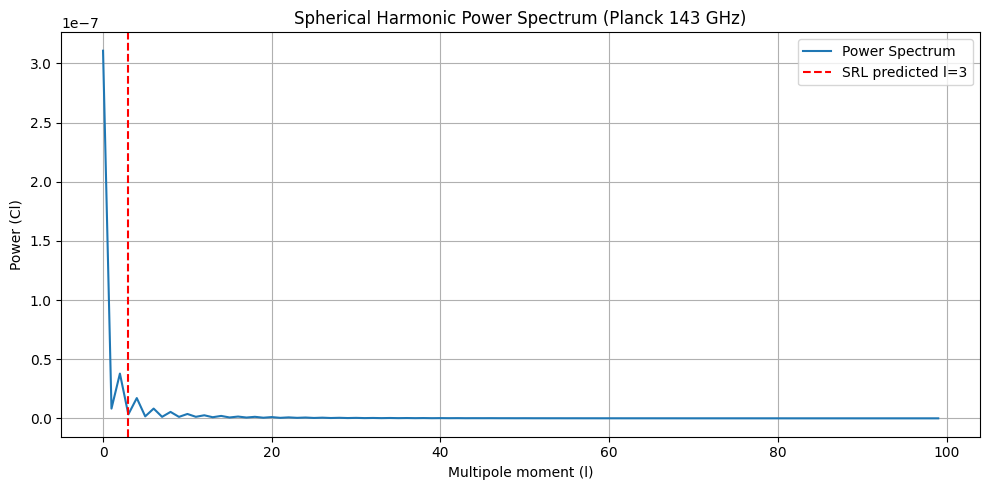

In [ ]:
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt

# Path to 143 GHz raw map
cmb_path = "/content/drive/MyDrive/CMB Data/HFI_SkyMap_143_2048_R3.01_full.fits"

# Load CMB map (temperature only)
cmb_map = hp.read_map(cmb_path, field=0, verbose=False)

# Compute power spectrum (Cl)
Cl = hp.anafast(cmb_map)
l_vals = np.arange(len(Cl))

# Display top harmonic modes
top_l = np.argsort(Cl)[::-1][:5]
print("Top 5 Harmonic Modes (l, Cl):")
for l in top_l:
    print(f"Mode l={l}: Cl = {Cl[l]:.3e}")

print(f"\nSRL-predicted mode (l=3): Cl = {Cl[3]:.3e}")

# Plot full spectrum
plt.figure(figsize=(10, 5))
plt.plot(l_vals[:100], Cl[:100], label='Power Spectrum')
plt.axvline(x=3, color='red', linestyle='--', label='SRL predicted l=3')
plt.title("Spherical Harmonic Power Spectrum (Planck 143 GHz)")
plt.xlabel("Multipole moment (l)")
plt.ylabel("Power (Cl)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/CMB Data/cmb_power_143GHz_spectrum.png")
plt.show()

<ipython-input-14-6849167755a6>:9: HealpyDeprecationWarning: "verbose" was deprecated in version 1.15.0 and will be removed in a future version. 
  cmb_map = hp.read_map(cmb_path, field=0, verbose=False)


Top 5 Harmonic Modes (l, Cl):
Mode l=0: Cl = 1.477e-07
Mode l=2: Cl = 2.047e-08
Mode l=4: Cl = 1.050e-08
Mode l=1: Cl = 7.731e-09
Mode l=6: Cl = 5.098e-09

SRL-predicted mode (l=3): Cl = 3.437e-09


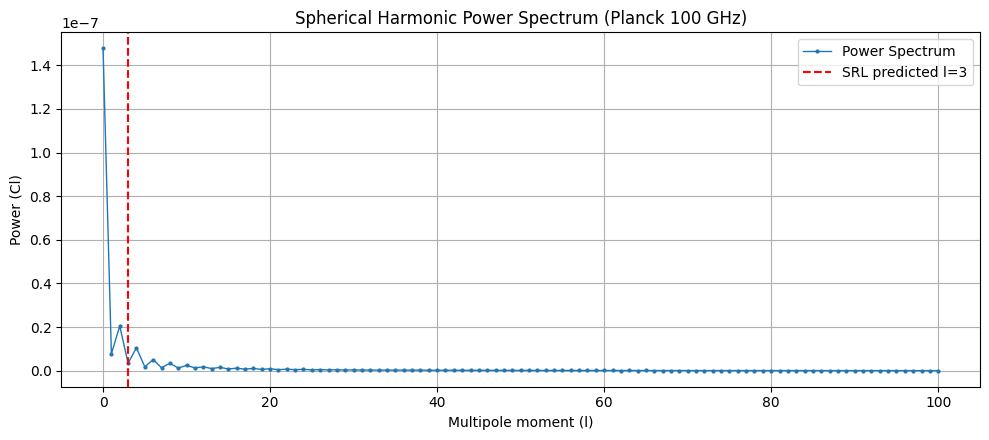

In [ ]:
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt

# File path for Planck 100 GHz map
cmb_path = '/content/drive/MyDrive/CMB Data/HFI_SkyMap_100_2048_R3.01_full.fits'

# Load temperature map
cmb_map = hp.read_map(cmb_path, field=0, verbose=False)

# Compute angular power spectrum
cl = hp.anafast(cmb_map, lmax=100)
ell = np.arange(len(cl))

# Report top modes
top_indices = np.argsort(cl)[::-1][:5]
print("Top 5 Harmonic Modes (l, Cl):")
for i in top_indices:
    print(f"Mode l={i}: Cl = {cl[i]:.3e}")
print(f"\nSRL-predicted mode (l=3): Cl = {cl[3]:.3e}")

# Plot
plt.figure(figsize=(10, 4.5))
plt.plot(ell, cl, label='Power Spectrum', marker='o', markersize=2, linewidth=1)
plt.axvline(x=3, color='r', linestyle='--', label='SRL predicted l=3')
plt.title("Spherical Harmonic Power Spectrum (Planck 100 GHz)")
plt.xlabel("Multipole moment (l)")
plt.ylabel("Power (Cl)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
!pip install healpy

<ipython-input-16-687363378c59>:13: HealpyDeprecationWarning: "verbose" was deprecated in version 1.15.0 and will be removed in a future version. 
  cmb_map = hp.read_map(cmb_path, field=0, verbose=False)


✅ Loaded map: /content/drive/MyDrive/CMB Data/HFI_SkyMap_217_2048_R3.01_full.fits
NSIDE: 2048, Pixels: 50331648


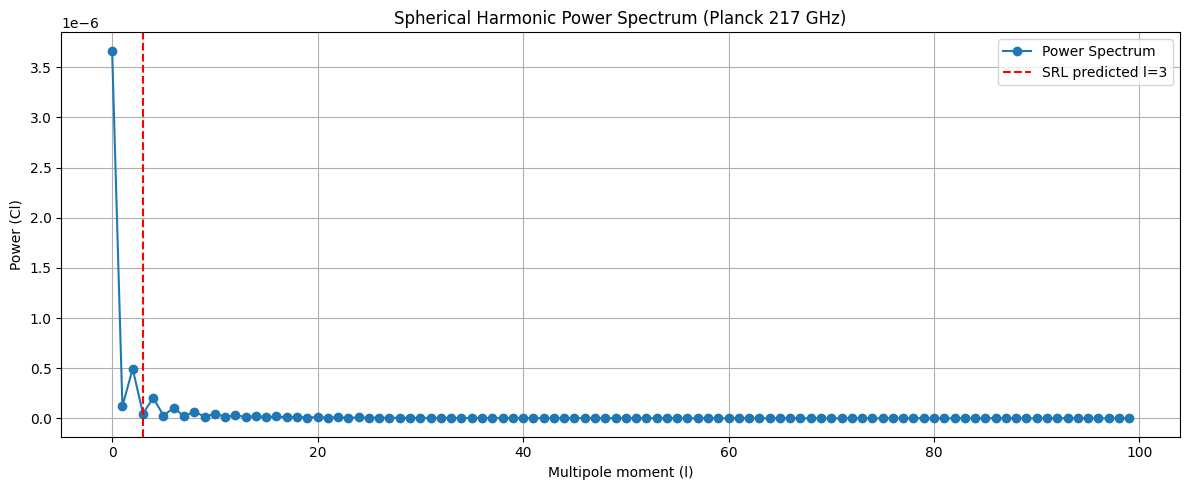

Top 5 Harmonic Modes (l, Cl):
Mode l=0: Cl = 3.665e-06
Mode l=2: Cl = 4.957e-07
Mode l=4: Cl = 2.041e-07
Mode l=1: Cl = 1.206e-07
Mode l=6: Cl = 1.048e-07

SRL-predicted mode (l=3): Cl = 4.801e-08


In [ ]:
# --- Install healpy if not already installed ---
!pip install healpy --quiet

# --- Import necessary libraries ---
import healpy as hp
import matplotlib.pyplot as plt
import numpy as np

# --- Define the file path for the 217 GHz Planck CMB map ---
cmb_path = "/content/drive/MyDrive/CMB Data/HFI_SkyMap_217_2048_R3.01_full.fits"

# --- Load the map ---
cmb_map = hp.read_map(cmb_path, field=0, verbose=False)
nside = hp.get_nside(cmb_map)
npix = hp.nside2npix(nside)
print(f"✅ Loaded map: {cmb_path}")
print(f"NSIDE: {nside}, Pixels: {npix}")

# --- Compute the power spectrum ---
cl = hp.anafast(cmb_map)
ell = np.arange(len(cl))

# --- Plotting ---
plt.figure(figsize=(12, 5))
plt.plot(ell[:100], cl[:100], marker='o', label='Power Spectrum')
plt.axvline(x=3, color='red', linestyle='--', label='SRL predicted l=3')
plt.title("Spherical Harmonic Power Spectrum (Planck 217 GHz)")
plt.xlabel("Multipole moment (l)")
plt.ylabel("Power (Cl)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Print top 5 modes ---
top_indices = np.argsort(cl[:50])[::-1][:5]
print("Top 5 Harmonic Modes (l, Cl):")
for i in top_indices:
    print(f"Mode l={i}: Cl = {cl[i]:.3e}")

print(f"\nSRL-predicted mode (l=3): Cl = {cl[3]:.3e}")

<ipython-input-17-6094c562613f>:10: HealpyDeprecationWarning: "verbose" was deprecated in version 1.15.0 and will be removed in a future version. 
  cmb_map = hp.read_map(cmb_path, field=0, verbose=False)


✅ Loaded map: /content/drive/MyDrive/CMB Data/HFI_SkyMap_353_2048_R3.01_full.fits
NSIDE: 2048, Pixels: 50331648


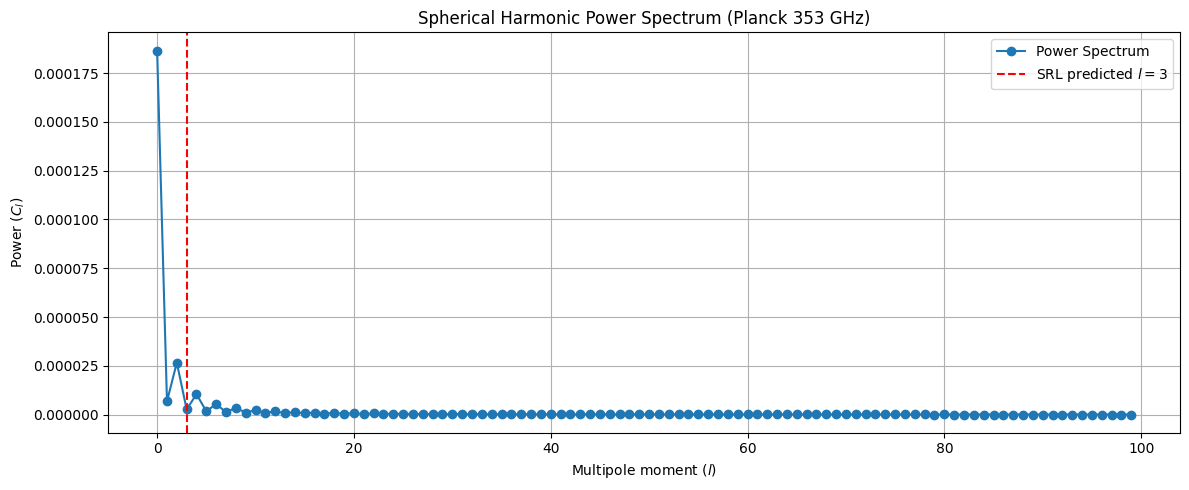

Top 5 Harmonic Modes (l, Cl):
Mode l=0: Cl = 1.866e-04
Mode l=2: Cl = 2.660e-05
Mode l=4: Cl = 1.047e-05
Mode l=1: Cl = 6.740e-06
Mode l=6: Cl = 5.485e-06

SRL-predicted mode (l=3): Cl = 2.633e-06


In [ ]:
# --- Load and Analyze Planck 353 GHz Map ---
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt

# Path to the 353 GHz FITS file in Drive
cmb_path = "/content/drive/MyDrive/CMB Data/HFI_SkyMap_353_2048_R3.01_full.fits"

# Load the map (temperature channel)
cmb_map = hp.read_map(cmb_path, field=0, verbose=False)
nside = hp.get_nside(cmb_map)
npix = hp.nside2npix(nside)
print(f"✅ Loaded map: {cmb_path}")
print(f"NSIDE: {nside}, Pixels: {npix}")

# Compute full-sky power spectrum
cl = hp.anafast(cmb_map)

# Get first 100 multipoles for clarity
l = np.arange(len(cl))[:100]

# Plot the azimuthal harmonic spectrum
plt.figure(figsize=(12, 5))
plt.plot(l, cl[:100], marker='o', linestyle='-', label='Power Spectrum')
plt.axvline(x=3, color='red', linestyle='--', label='SRL predicted $l=3$')
plt.title('Spherical Harmonic Power Spectrum (Planck 353 GHz)')
plt.xlabel('Multipole moment ($l$)')
plt.ylabel('Power ($C_l$)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print top harmonic modes
top_modes = sorted([(i, val) for i, val in enumerate(cl[:50])], key=lambda x: -x[1])[:5]
print("Top 5 Harmonic Modes (l, Cl):")
for mode, val in top_modes:
    print(f"Mode l={mode}: Cl = {val:.3e}")
print(f"\nSRL-predicted mode (l=3): Cl = {cl[3]:.3e}")

In [18]:
# --- Mount Google Drive ---
from google.colab import drive
drive.mount('/content/drive')

# --- Create target directory if it doesn't exist ---
import os
target_dir = "/content/drive/MyDrive/CMB Data"
os.makedirs(target_dir, exist_ok=True)

# --- Download NILC CMB map from Planck R3 ---
import urllib.request

url = "https://irsa.ipac.caltech.edu/data/Planck/release_3/all-sky-maps/maps/component-maps/cmb/COM_CMB_IQU-nilc_2048_R3.00_full.fits"
filename = os.path.join(target_dir, "COM_CMB_IQU-nilc_2048_R3.00_full.fits")

print(f"Downloading to: {filename}")
urllib.request.urlretrieve(url, filename)
print("✅ NILC map successfully downloaded to Drive.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ NILC map successfully downloaded to Drive.


In [19]:
import os
import healpy as hp

# Path to the NILC map
nilc_path = "/content/drive/MyDrive/CMB Data/COM_CMB_IQU-nilc_2048_R3.00_full.fits"

# Check if file exists
if os.path.exists(nilc_path):
    file_size = os.path.getsize(nilc_path) / (1024 ** 2)  # MB
    print(f"✅ NILC file found. Size: {file_size:.2f} MB")

    try:
        # Try loading field 0 (usually the temperature component)
        cmb_map = hp.read_map(nilc_path, field=0, verbose=False)
        print(f"✅ Successfully loaded NILC map with {len(cmb_map)} pixels.")
    except Exception as e:
        print("❌ Error loading NILC map:", str(e))
else:
    print("❌ NILC file not found.")

✅ NILC file found. Size: 1536.05 MB


<ipython-input-19-e5e381731fa4>:14: HealpyDeprecationWarning: "verbose" was deprecated in version 1.15.0 and will be removed in a future version. 
  cmb_map = hp.read_map(nilc_path, field=0, verbose=False)


✅ Successfully loaded NILC map with 50331648 pixels.


Top 5 Harmonic Modes (l, Cl):
Mode l=3: Cl = 4.902e-10
Mode l=5: Cl = 3.045e-10
Mode l=4: Cl = 2.332e-10
Mode l=2: Cl = 2.084e-10
Mode l=7: Cl = 1.267e-10

SRL-predicted mode (l=3): Cl = 4.902e-10


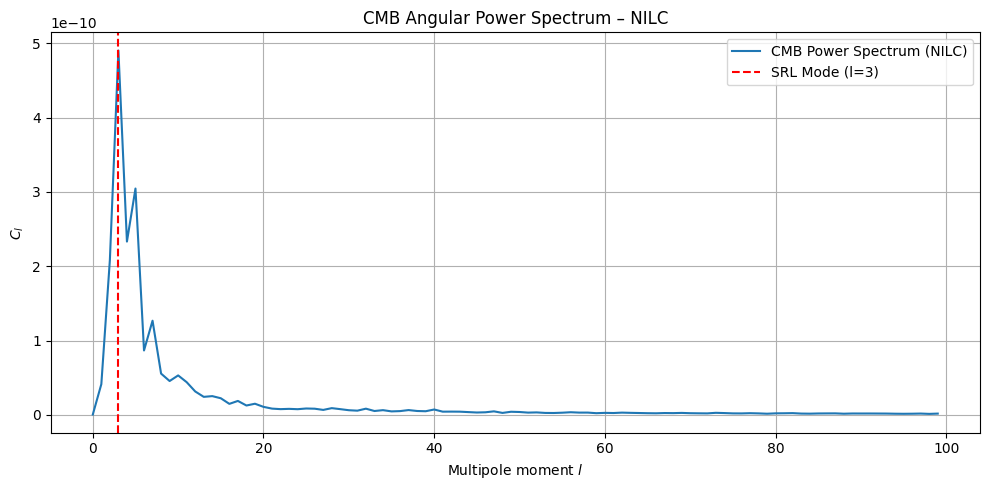

In [20]:
import matplotlib.pyplot as plt

# Compute the angular power spectrum (Cl)
cl_nilc = hp.anafast(cmb_map)

# Identify top 5 multipoles by Cl value
top_modes = sorted(enumerate(cl_nilc[:100]), key=lambda x: x[1], reverse=True)[:5]

print("Top 5 Harmonic Modes (l, Cl):")
for l, cl in top_modes:
    print(f"Mode l={l}: Cl = {cl:.3e}")

# SRL-predicted mode
print(f"\nSRL-predicted mode (l=3): Cl = {cl_nilc[3]:.3e}")

# Plot full Cl spectrum
plt.figure(figsize=(10, 5))
plt.plot(cl_nilc[:100], label="CMB Power Spectrum (NILC)")
plt.axvline(3, color='r', linestyle='--', label="SRL Mode (l=3)")
plt.xlabel("Multipole moment $l$")
plt.ylabel("$C_l$")
plt.title("CMB Angular Power Spectrum – NILC")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-21-aff86ce30d4c>:10: HealpyDeprecationWarning: "verbose" was deprecated in version 1.15.0 and will be removed in a future version. 
  cmb_map = hp.read_map(cmb_path, field=0, verbose=False)
<ipython-input-21-aff86ce30d4c>:11: HealpyDeprecationWarning: "verbose" was deprecated in version 1.15.0 and will be removed in a future version. 
  mask = hp.read_map(mask_path, verbose=False)


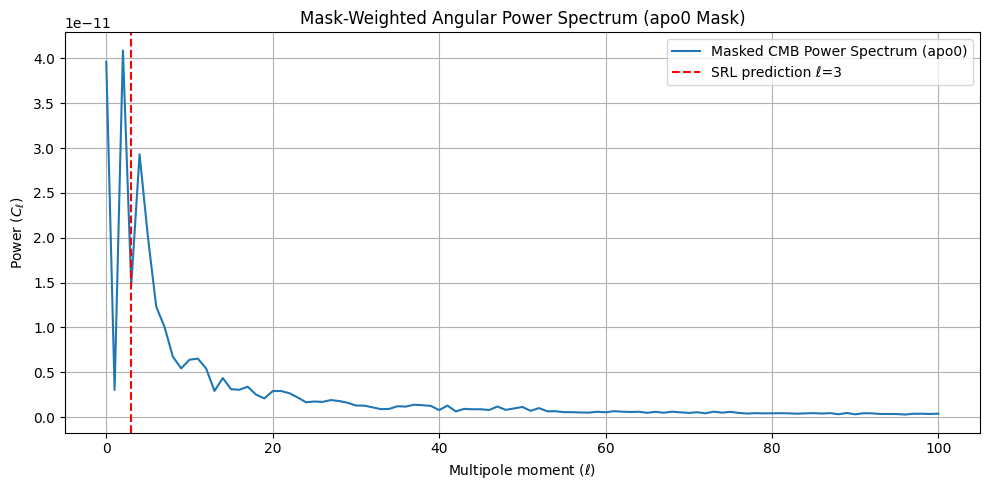

Top 5 Harmonic Modes (l, Cl):
Mode l=2: Cl = 4.087e-11
Mode l=0: Cl = 3.961e-11
Mode l=4: Cl = 2.930e-11
Mode l=5: Cl = 2.013e-11
Mode l=3: Cl = 1.472e-11

SRL-predicted mode (l=3): Cl = 1.472e-11


In [21]:
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt

# File paths
cmb_path = "/content/drive/MyDrive/CMB Data/COM_CMB_IQU-smica_2048_R3.00_full (1).fits"
mask_path = "/content/drive/MyDrive/CMB Data/HFI_Mask_GalPlane-apo0_2048_R2.00.fits"

# Load CMB temperature map and mask
cmb_map = hp.read_map(cmb_path, field=0, verbose=False)
mask = hp.read_map(mask_path, verbose=False)

# Apply the mask
masked_map = hp.ma(cmb_map)
masked_map.mask = np.logical_not(mask)

# Compute spherical harmonic coefficients (with mask applied)
alm = hp.map2alm(masked_map.filled(), lmax=100)
cl_masked = hp.alm2cl(alm)

# Plot the power spectrum
plt.figure(figsize=(10, 5))
plt.plot(cl_masked, label='Masked CMB Power Spectrum (apo0)')
plt.axvline(x=3, color='r', linestyle='--', label='SRL prediction ℓ=3')
plt.xlabel('Multipole moment ($\ell$)')
plt.ylabel('Power ($C_\ell$)')
plt.title('Mask-Weighted Angular Power Spectrum (apo0 Mask)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print top 5 harmonic modes
top_modes = np.argsort(cl_masked)[-5:][::-1]
print("Top 5 Harmonic Modes (l, Cl):")
for l in top_modes:
    print(f"Mode l={l}: Cl = {cl_masked[l]:.3e}")

print(f"\nSRL-predicted mode (l=3): Cl = {cl_masked[3]:.3e}")

<ipython-input-22-29e43768fb61>:10: HealpyDeprecationWarning: "verbose" was deprecated in version 1.15.0 and will be removed in a future version. 
  cmb_map = hp.read_map(cmb_path, field=0, verbose=False)
<ipython-input-22-29e43768fb61>:11: HealpyDeprecationWarning: "verbose" was deprecated in version 1.15.0 and will be removed in a future version. 
  mask = hp.read_map(mask_path, verbose=False)


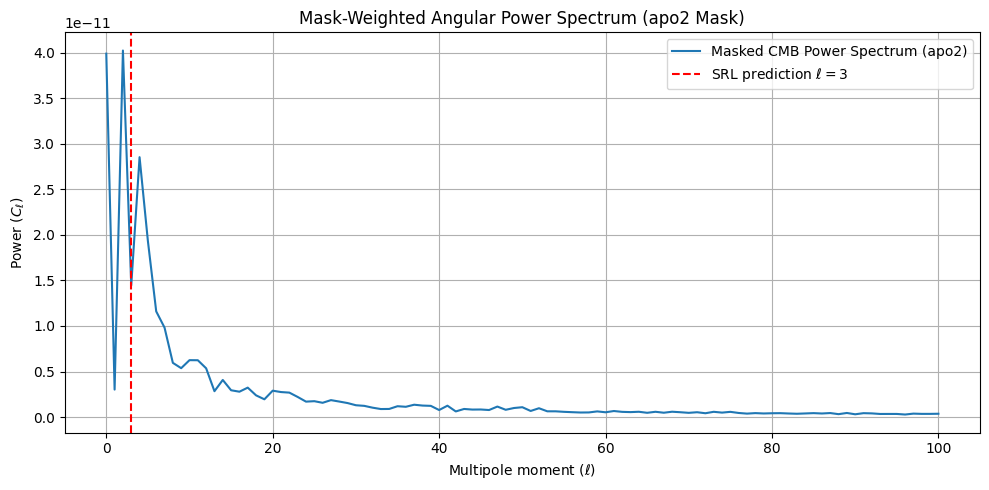

Top 5 Harmonic Modes (l, Cl):
Mode l=2: Cl = 4.026e-11
Mode l=0: Cl = 3.991e-11
Mode l=4: Cl = 2.854e-11
Mode l=5: Cl = 1.934e-11
Mode l=3: Cl = 1.446e-11

SRL-predicted mode (l=3): Cl = 1.446e-11


In [22]:
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt

# File paths
cmb_path = "/content/drive/MyDrive/CMB Data/COM_CMB_IQU-smica_2048_R3.00_full (1).fits"
mask_path = "/content/drive/MyDrive/CMB Data/HFI_Mask_GalPlane-apo2_2048_R2.00.fits"

# Load CMB temperature map and mask
cmb_map = hp.read_map(cmb_path, field=0, verbose=False)
mask = hp.read_map(mask_path, verbose=False)

# Apply the mask
masked_map = hp.ma(cmb_map)
masked_map.mask = np.logical_not(mask)

# Compute spherical harmonic coefficients
alm = hp.map2alm(masked_map.filled(), lmax=100)
cl_masked = hp.alm2cl(alm)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(cl_masked, label='Masked CMB Power Spectrum (apo2)')
plt.axvline(x=3, color='r', linestyle='--', label='SRL prediction $\ell=3$')
plt.xlabel('Multipole moment ($\ell$)')
plt.ylabel('Power ($C_\ell$)')
plt.title('Mask-Weighted Angular Power Spectrum (apo2 Mask)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print top 5 harmonic modes
top_modes = np.argsort(cl_masked)[-5:][::-1]
print("Top 5 Harmonic Modes (l, Cl):")
for l in top_modes:
    print(f"Mode l={l}: Cl = {cl_masked[l]:.3e}")

print(f"\nSRL-predicted mode (l=3): Cl = {cl_masked[3]:.3e}")